
Below code for the research paper

Paper Title : Hybrid ensemble techniques used for classifier and feature selection in intrusion detection systems

Journal : International Journal Commun. Networks Distributed System

Volume: 28

Number: 4

PP: 389-413

ISSN: 1754-3916

ISSN (Online): 1754-3924

DOI: 10.1504/IJCNDS.2022.123854

Author : 1) Ankit Kharwar 2) Devendra Thakor

In [1]:
!pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import sys
import sklearn
print(pd.__version__)
print(np.__version__)
print(sys.version)
print(sklearn.__version__)

1.3.5
1.21.6
3.8.10 (default, Nov 14 2022, 12:59:47) 
[GCC 9.4.0]
1.0.2


In [3]:
# if you run on google cloab with google drive the below code is required and give the permission to the google drive by login
# if you run on your computer then you can skip upto 3 steps
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os
import pandas as pd
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# after the given permission to access the google drive. take the parth of folder you want to acccess for the training and testing file
file_list = drive.ListFile({'q': "' here ' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))
     

In [5]:
#list of all the file in the the above folder mention.
# take the id of that file you want to you for training and tesing and give the name as train.csv and test.csv
train_downloaded = drive.CreateFile({'id': ' id '})

train_downloaded.GetContentFile('train.csv')
test_downloaded = drive.CreateFile({'id': 'id '})

test_downloaded.GetContentFile('test.csv')


## Data Reading

In [6]:
# col name of the dataset
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","a1"]

# if you don't use google colab then directly give the parth of the file at time of read csv
df = pd.read_csv("train.csv", header=None, names = col_names)
df_test = pd.read_csv("test.csv", header=None, names = col_names)

#drop extra column from the dataset
df=df.drop(columns=['a1'])
df_test=df_test.drop(columns=['a1'])

# shape, this gives the dimensions of the dataset
print('Dimensions of the Training set:',df.shape)
print('Dimensions of the Test set:',df_test.shape)

Dimensions of the Training set: (25192, 42)
Dimensions of the Test set: (22544, 42)


In [7]:
#display first five record from dataset
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


# Data Preprocessing


1.   Remove Duplicate Row
2.   Relabeling the label
3.   Label Encoding

In [8]:
#remove duplicate data from training and testing and display the before and after the removing duplicate records
print("Before Processing of training data",df.shape)
df.drop_duplicates(keep=False,inplace=True) 
print("After Processing of training data", df.shape)
print("Before Processing of testing data",df_test.shape)
df_test.drop_duplicates(keep=False,inplace=True) 
print("After Processing of testing data", df_test.shape)

Before Processing of training data (25192, 42)
After Processing of training data (25192, 42)
Before Processing of testing data (22544, 42)
After Processing of testing data (22544, 42)


In [9]:
# take label column 
labeldf=df['label']
labeldf_test=df_test['label']

# relabing the attack column. 
#convert the subcategories of attack into the main attack
# 0 means normal 
# 1 means Dos Attack
# 2 means Probe attack
# 3 means R2L attack
# 4 means U2R attack

newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})

# put the new label column back in the dataset
df['label'] = newlabeldf
df_test['label'] = newlabeldf_test

# Split dataframes into X & Y
# assign X as a dataframe of feautures and Y as a series of outcome variables

X_df = df.drop('label',1)
Y_df = df.label
# test set
X_df_test = df_test.drop('label',1)
Y_df_test = df_test.label

# reshape the label for training and testing
Y_df.values.reshape(-1)
Y_df_test.values.reshape(-1)

# apply label encoder (convert categorical data to numerical data)
from sklearn.preprocessing import LabelEncoder

X_df= X_df.apply(LabelEncoder().fit_transform)
X_df_test= X_df_test.apply(LabelEncoder().fit_transform)

<ipython-input-9-071cae2a6cb4>:23: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_df = df.drop('label',1)
<ipython-input-9-071cae2a6cb4>:26: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_df_test = df_test.drop('label',1)


In [10]:
# attack distribution on training and testing dataset.
print('Label distribution of Training set:')
print(df['label'].value_counts())
print()
print('Label distribution of Test set:')
print(df_test['label'].value_counts())

Label distribution of Training set:
0    13449
1     9234
2     2289
3      209
4       11
Name: label, dtype: int64

Label distribution of Test set:
0    9711
1    7460
3    2885
2    2421
4      67
Name: label, dtype: int64


# Feature Selection


In [13]:
#import SFS (search feature selection)
import joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import ExtraTreesClassifier

import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

sfs = SFS(ExtraTreesClassifier(n_jobs=10), # give the classification algorithm
       k_features=(1,41),    # give range of feature in dataset
       forward=True,    
       floating=False, 
       verbose=2,
       scoring='accuracy',
       cv=10, n_jobs=15)

#fit with training data
sfs1 = sfs.fit(X_df, Y_df)

[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  11 tasks      | elapsed:  1.6min
[Parallel(n_jobs=15)]: Done  33 out of  41 | elapsed:  3.0min remaining:   43.4s
[Parallel(n_jobs=15)]: Done  41 out of  41 | elapsed:  3.2min finished

[2023-02-22 04:38:03] Features: 1/41 -- score: 0.9259684965689333[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  11 tasks      | elapsed:  2.0min
[Parallel(n_jobs=15)]: Done  32 out of  40 | elapsed:  3.9min remaining:   58.7s
[Parallel(n_jobs=15)]: Done  40 out of  40 | elapsed:  4.4min finished

[2023-02-22 04:42:26] Features: 2/41 -- score: 0.9808274731091323[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  30 out of  39 | elapsed:  4.5min remaining:  1.3min
[Parallel(n_jobs=15)]: Done  39 out of  39 | elapsed:  5.0min finished

[2023-02-22 04:47:25] Features: 3/41 -- score: 0.9892824

In [14]:
import pandas as pd
pd.DataFrame.from_dict(sfs.get_metric_dict(confidence_interval=0.998)).T


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(4,)","[0.9178571428571428, 0.9357142857142857, 0.930...",0.925968,"(src_bytes,)",0.008873,0.006424,0.002141
2,"(4, 34)","[0.9757936507936508, 0.9801587301587301, 0.983...",0.980827,"(src_bytes, dst_host_diff_srv_rate)",0.003204,0.00232,0.000773
3,"(2, 4, 34)","[0.9853174603174604, 0.9904761904761905, 0.989...",0.989282,"(service, src_bytes, dst_host_diff_srv_rate)",0.002685,0.001944,0.000648
4,"(2, 4, 34, 39)","[0.9920634920634921, 0.9948412698412699, 0.994...",0.994879,"(service, src_bytes, dst_host_diff_srv_rate, d...",0.001775,0.001285,0.000428
5,"(2, 4, 34, 37, 39)","[0.9956349206349207, 0.996031746031746, 0.9972...",0.996348,"(service, src_bytes, dst_host_diff_srv_rate, d...",0.000877,0.000635,0.000212
6,"(0, 2, 4, 34, 37, 39)","[0.9964285714285714, 0.9968253968253968, 0.997...",0.997142,"(duration, service, src_bytes, dst_host_diff_s...",0.000911,0.000659,0.00022
7,"(0, 2, 4, 22, 34, 37, 39)","[0.9968253968253968, 0.9972222222222222, 0.997...",0.99746,"(duration, service, src_bytes, count, dst_host...",0.000956,0.000692,0.000231
8,"(0, 1, 2, 4, 22, 34, 37, 39)","[0.9968253968253968, 0.9976190476190476, 0.998...",0.997539,"(duration, protocol_type, service, src_bytes, ...",0.001145,0.000829,0.000276
9,"(0, 1, 2, 4, 22, 26, 34, 37, 39)","[0.9972222222222222, 0.9972222222222222, 0.998...",0.997857,"(duration, protocol_type, service, src_bytes, ...",0.000924,0.000669,0.000223
10,"(0, 1, 2, 4, 9, 22, 26, 34, 37, 39)","[0.9972222222222222, 0.998015873015873, 0.9984...",0.997976,"(duration, protocol_type, service, src_bytes, ...",0.000713,0.000516,0.000172


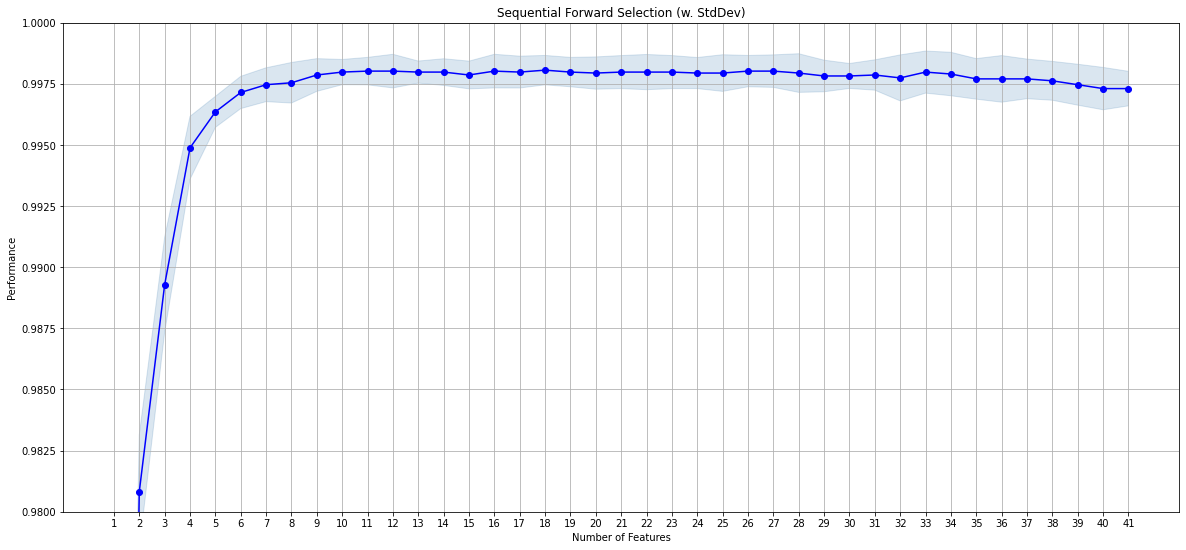

In [15]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev',figsize=(20, 9))

plt.ylim([0.98, 1.0])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [16]:
l=[]
# take the best feature from SFS model
for feature_list_index in sfs.k_feature_names_:
  l.append(feature_list_index)

#print the best selected feature name according SFS
print(l)
#print the length of the feature
print("no of feature",len(l))

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'hot', 'root_shell', 'su_attempted', 'num_root', 'num_access_files', 'count', 'srv_count', 'srv_serror_rate', 'rerror_rate', 'dst_host_diff_srv_rate', 'dst_host_serror_rate', 'dst_host_rerror_rate']
no of feature 18


In [17]:
X_adf = X_df[l]
X_adf_test = X_df_test[l]

## Classification

In [19]:
# hybid classification Adaboost + extra-Tree

from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


#hyperparamater for extra-tree

fit_rf = ExtraTreesClassifier(random_state=42)

np.random.seed(42)

# hyperparamater for bootstrap, max_features, and criterion

param_dist = {'bootstrap': [True, False],
            'max_features': ['auto', 'sqrt', 'log2'],
            'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                   param_grid=param_dist, verbose=2,
                   n_jobs = 10)

cv_rf.fit(X_adf, Y_df)
print('Best Parameters using grid search: \n', 
    cv_rf.best_params_)

#given the best paramater to dict

d={}
d=cv_rf.best_params_

# set the Extra-Tree value with hyper-paramater
et= ExtraTreesClassifier( criterion=d['criterion'],
                max_features=d['max_features'], 
                bootstrap=d['bootstrap'])

# hyperparamater for n_estimator for adboost
fit_rf1=AdaBoostClassifier(base_estimator=et)


param_dist1 = {'n_estimators': [10,60,70,80,90]}

cv_rf1 = GridSearchCV(fit_rf1, cv = 10,
                   param_grid=param_dist1, verbose=2,
                   n_jobs = 10)

cv_rf1.fit(X_adf, Y_df)
print('Best Parameters using grid search: \n', 
    cv_rf1.best_params_)
#given the best paramater to dict

d1={}
d1=cv_rf1.best_params_
#print(d)
l2=list(d1.values())
print("best estimator",l2[0])

# set value to adaboost with extra-tree classification
bdt=AdaBoostClassifier(n_estimators=l2[0],base_estimator=et)
bdt.fit(X_adf, Y_df)

# training and testing accuracy score

y_pred_train = bdt.predict(X_adf)
y_pred_test = bdt.predict(X_adf_test)

accuracy_train = accuracy_score(Y_df, y_pred_train)
accuracy_test = accuracy_score(Y_df_test, y_pred_test)

print("Training accuracy: %.4f" % accuracy_train)
print("Testing accuracy:  %.4f" % accuracy_test)


# apply 10-cross fold valdiation and print confusion_matrix


y_pred_cv = cross_val_predict(bdt, X_adf_test, Y_df_test, cv=10,verbose=2,n_jobs=10)
accuracy_test = accuracy_score(Y_df_test, y_pred_cv)
print("CV Testing accuracy:  %.4f" % accuracy_test)
conf_mat = confusion_matrix(Y_df_test, y  _pred_cv)
print(conf_mat)
d_rf=round((conf_mat[0][0]/conf_mat[0].sum())*100,2)
print('Detection rate of Normal',d_rf)
d_rf=round((conf_mat[1][1]/conf_mat[1].sum())*100,2)
print('Detection rate of DOS',d_rf)
d_rf=round((conf_mat[2][2]/conf_mat[2].sum())*100,2)
print('Detection rate of Prob',d_rf)
d_rf=round((conf_mat[3][3]/conf_mat[3].sum())*100,2)
print('Detection rate of R2L',d_rf)
d_rf=round((conf_mat[4][4]/conf_mat[4].sum())*100,2)
print('Detection rate of U2R',d_rf)

print(classification_report(Y_df_test, y_pred_cv))

Fitting 10 folds for each of 12 candidates, totalling 120 fits
Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'entropy', 'max_features': 'auto'}
Fitting 10 folds for each of 5 candidates, totalling 50 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters using grid search: 
 {'n_estimators': 10}
best estimator 10
Training accuracy: 1.0000
Testing accuracy:  0.7270


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:  1.2min remaining:  2.8min


CV Testing accuracy:  0.9872
[[9574   15   23   92    7]
 [  14 7439    6    1    0]
 [  21    1 2399    0    0]
 [  82    2    3 2789    9]
 [  10    0    0    3   54]]
Detection rate of Normal 98.59
Detection rate of DOS 99.72
Detection rate of Prob 99.09
Detection rate of R2L 96.67
Detection rate of U2R 80.6
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9711
           1       1.00      1.00      1.00      7460
           2       0.99      0.99      0.99      2421
           3       0.97      0.97      0.97      2885
           4       0.77      0.81      0.79        67

    accuracy                           0.99     22544
   macro avg       0.94      0.95      0.95     22544
weighted avg       0.99      0.99      0.99     22544



[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:  2.4min finished


In [20]:
# convert into 2 lable for finding of the False alarm rate and detetion rate of the Extra-Tree model with best feature
# First 0 means normal and 1 means attack then interchange with 0 means attack and 1 means normal in y_df2

Y_df1 = Y_df.copy()
Y_df1[Y_df1!=0] = 1
Y_df2 = Y_df1.copy()
Y_df2[Y_df2==0] = 100
Y_df2[Y_df2!=100] = 0
Y_df2[Y_df2==100] = 1

Y_df_test1 = Y_df_test.copy()
Y_df_test1[Y_df_test1!=0] = 1
Y_df_test2 = Y_df_test1.copy()
Y_df_test2[Y_df_test2==0] = 100
Y_df_test2[Y_df_test2!=100] = 0
Y_df_test2[Y_df_test2==100] = 1

In [21]:
print('Label distribution Training set:')
print(Y_df2.value_counts())
print()
print('Label distribution Test set:')
print(Y_df_test2.value_counts())

Label distribution Training set:
1    13449
0    11743
Name: label, dtype: int64

Label distribution Test set:
0    12833
1     9711
Name: label, dtype: int64


In [22]:
#find best paramater for extra-tree

fit_rf = ExtraTreesClassifier(random_state=42)

param_dist = {'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2'],
              'criterion': ['gini', 'entropy']}
               
cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist,verbose=2,
                     n_jobs = 20)

cv_rf.fit(X_adf, Y_df2)
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)

#best paramater give to dist
l1=[]
d={}
d=cv_rf.best_params_
l1=list(d.values())



et= ExtraTreesClassifier( criterion=d['criterion'],
                      max_features=d['max_features'], 
                      bootstrap=d['bootstrap'])

# find best n_estimator for adboost
fit_rf1=AdaBoostClassifier(base_estimator=et)

param_dist1 = {'n_estimators': [10,20,30,40,50]}

cv_rf1 = GridSearchCV(fit_rf1, cv = 10,
                     param_grid=param_dist1, 
                     n_jobs = 10)

cv_rf1.fit(X_adf, Y_df2)
print('Best Parameters using grid search: \n', 
      cv_rf1.best_params_)
l2=[]
d1={}
d1=cv_rf1.best_params_
#print(d)
l2=list(d1.values())
print("best estimator",l2[0])


#train with best paramater 
bdt=AdaBoostClassifier(n_estimators=l2[0],base_estimator=et)
bdt.fit(X_adf, Y_df2)
y_pred_train = bdt.predict(X_adf)
y_pred_test = bdt.predict(X_adf_test)

accuracy_train = accuracy_score(Y_df2, y_pred_train)
accuracy_test = accuracy_score(Y_df_test1, y_pred_test)

print("Training accuracy: %.4f" % accuracy_train)
print("Testing accuracy:  %.4f" % accuracy_test)


pd.crosstab(Y_df_test2, y_pred_test, rownames=['Actual attacks'], colnames=['Predicted attacks'])
rf_scores=confusion_matrix(Y_df_test2, y_pred_test)
print(rf_scores)
n_rf=round((rf_scores[0][0]/rf_scores[0].sum())*100,2)
print('Detection rate of Attack',n_rf)
d_rf=round((rf_scores[1][1]/rf_scores[1].sum())*100,2)
print('Detection rate of Normal',d_rf)


#10-cross validation and print confusion matrix and other paramater

y_pred_cv = cross_val_predict(bdt, X_adf_test, Y_df_test2, cv=10,verbose=2,n_jobs=10 )
accuracy_test = accuracy_score(Y_df_test2, y_pred_cv)
print(classification_report(Y_df_test2, y_pred_cv))

print("CV Testing accuracy:  %.4f" % accuracy_test)
conf_mat = confusion_matrix(Y_df_test2, y_pred_cv)
print(conf_mat)
n_rf=round((conf_mat[0][0]/conf_mat[0].sum())*100,2)
print('Detection rate of Attack',n_rf)
d_rf=round((conf_mat[1][1]/conf_mat[1].sum())*100,2)
print('Detection rate of Normal',d_rf)

print(classification_report(Y_df_test2, y_pred_cv))

print("False alarm rate (FAR)")
far=conf_mat[1][0]/(conf_mat[1][0]+conf_mat[1][1])
print(far*100)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'entropy', 'max_features': 'auto'}
Best Parameters using grid search: 
 {'n_estimators': 40}
best estimator 40
Training accuracy: 1.0000
Testing accuracy:  0.2102
[[8453 4380]
 [ 359 9352]]
Detection rate of Attack 65.87
Detection rate of Normal 96.3


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:  3.9min remaining:  9.1min


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12833
           1       0.99      0.98      0.99      9711

    accuracy                           0.99     22544
   macro avg       0.99      0.99      0.99     22544
weighted avg       0.99      0.99      0.99     22544

CV Testing accuracy:  0.9881
[[12717   116]
 [  152  9559]]
Detection rate of Attack 99.1
Detection rate of Normal 98.43
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12833
           1       0.99      0.98      0.99      9711

    accuracy                           0.99     22544
   macro avg       0.99      0.99      0.99     22544
weighted avg       0.99      0.99      0.99     22544

False alarm rate (FAR)
1.5652353001750594


[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:  6.3min finished
